In [5]:
pip install tensorflow

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pydot

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install graphviz

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pydot
import graphviz

In [3]:
inputs = keras.Input(shape=(784,))

#####   This is a basic graph with three layers. To build this model using the functional API, start by creating an input node. The shape of the data is set as a 784-dimensional vector. The batch size is always omitted since only the shape of each sample is specified.

In [4]:
img_inputs = keras.Input(shape=(32,32,3))

### example, you have an image input with a shape of (32, 32, 3), you would use:

In [5]:
inputs.shape

TensorShape([None, 784])

In [6]:
inputs.dtype

tf.float32

#### You create a new node in the graph of layers by calling a layer on this inputs object:



In [7]:
dense = layers.Dense(64,activation="relu")
x = dense(inputs)

#### The "layer call" action is like drawing an arrow from "inputs" to this layer you created. You're "passing" the inputs to the dense layer, and you get x as the output.

#### Let's add a few more layers to the graph of layers:

In [10]:
x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(10)(x)

In [11]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [12]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


### Below you will see a plot of our model as a graph

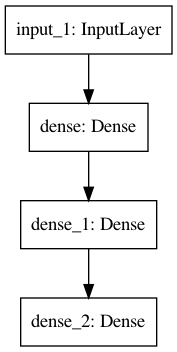

In [13]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png")

###  A "graph of layers" is an intuitive mental image for a deep learning model, and the functional API is a way to create models that closely mirrors this.

### Training, evaluation, and inference

In [21]:
(x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

x_train = x_trian.reshap(60000, 784).astype("float32") / 255
y_test = x_test.reshap(10000, 784).astype("float32") / 255

model.compile(
    loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train,y_train,batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss: ",test_score(0))
print("Test accuracy: ",test_scores[1])

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)